In [1]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as pex
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)

In [3]:
chen_data=pd.read_csv("Zomato Chennai Listing 2020.csv")
chen_data

Zomato URL  \
0      https://www.zomato.com/chennai/yaa-mohaideen-b...   
1      https://www.zomato.com/chennai/sukkubhai-biriy...   
2      https://www.zomato.com/chennai/ss-hyderabad-bi...   
3            https://www.zomato.com/chennai/kfc-perambur   
4      https://www.zomato.com/chennai/tasty-kitchen-p...   
...                                                  ...   
12027  https://www.zomato.com/chennai/cks-sandwiches-...   
12028  https://www.zomato.com/chennai/cks-sandwiches-...   
12029  https://www.zomato.com/chennai/cks-sandwiches-...   
12030  https://www.zomato.com/chennai/cks-sandwiches-...   
12031  https://www.zomato.com/chennai/cks-sandwiches-...   

          Name of Restaurant  \
0      Yaa Mohaideen Briyani   
1         Sukkubhai Biriyani   
2       SS Hyderabad Biryani   
3                        KFC   
4              Tasty Kitchen   
...                      ...   
12027        CK's Sandwiches   
12028        CK's Sandwiches   
12029        CK's Sandwiches   
12030        CK's Sandwiches   
12031        CK's Sandwiches   

                                                 Address         Location  \
0              336 & 338, Main Road, Pallavaram, Chennai       Pallavaram   
1       New 14, Old 11/3Q, Railway Station Road, MKN ...          Alandur   
2       98/339, Arcot Road, Opposite Gokulam Chit Fun...      Kodambakkam   
3       10, Periyar Nagar, 70 Feet Road, Near Sheeba ...         Perambur   
4       135B, SRP Colony, Peravallur, Near Perambur, ...         Perambur   
...                                                  ...              ...   
12027                                      Delivery Only            Porur   
12028                                      Delivery Only         Kolathur   
12029                                      Delivery Only  Anna Nagar East   
12030                                      Delivery Only        Ramapuram   
12031                                      Delivery Only   Sholinganallur   

                                                 Cuisine  \
0                                            ['Biryani']   
1      ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2      ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3      ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4      ['Chinese', ' Biryani', ' North Indian', ' Che...   
...                                                  ...   
12027                                       ['Sandwich']   
12028                                       ['Sandwich']   
12029                                       ['Sandwich']   
12030                                       ['Sandwich']   
12031                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
0      ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1      ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2      ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                      ['Zinger Burger']        500.0   
4      ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   
...                                                  ...          ...   
12027                                            Invalid        350.0   
12028                                            Invalid        350.0   
12029                                            Invalid        350.0   
12030                                            Invalid        350.0   
12031                                            Invalid        350.0   

       Dining Rating Dining Rating Count  Delivery Rating  \
0                4.3                1500              4.3   
1                4.4                3059              4.1   
2                4.3                1361              4.4   
3                4.0                1101              4.0   
4                4.2                 617              4.1   
...              ...                 ...           

In [4]:
chen_data.shape

(12032, 12)

In [5]:
chen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
chen_data.describe()

Price for 2  Dining Rating  Delivery Rating
count  12032.000000    6681.000000      6181.000000
mean     397.611370       3.387756         3.805290
std      332.045938       0.558181         0.374213
min       40.000000       0.300000         0.300000
25%      200.000000       3.100000         3.600000
50%      300.000000       3.500000         3.900000
75%      450.000000       3.800000         4.000000
max     5000.000000       4.900000         4.700000

In [7]:
chen_data.drop(['Zomato URL','Address'],axis=1,inplace=True)
chen_data

Name of Restaurant         Location  \
0      Yaa Mohaideen Briyani       Pallavaram   
1         Sukkubhai Biriyani          Alandur   
2       SS Hyderabad Biryani      Kodambakkam   
3                        KFC         Perambur   
4              Tasty Kitchen         Perambur   
...                      ...              ...   
12027        CK's Sandwiches            Porur   
12028        CK's Sandwiches         Kolathur   
12029        CK's Sandwiches  Anna Nagar East   
12030        CK's Sandwiches        Ramapuram   
12031        CK's Sandwiches   Sholinganallur   

                                                 Cuisine  \
0                                            ['Biryani']   
1      ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2      ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3      ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4      ['Chinese', ' Biryani', ' North Indian', ' Che...   
...                                                  ...   
12027                                       ['Sandwich']   
12028                                       ['Sandwich']   
12029                                       ['Sandwich']   
12030                                       ['Sandwich']   
12031                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
0      ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1      ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2      ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                      ['Zinger Burger']        500.0   
4      ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   
...                                                  ...          ...   
12027                                            Invalid        350.0   
12028                                            Invalid        350.0   
12029                                            Invalid        350.0   
12030                                            Invalid        350.0   
12031                                            Invalid        350.0   

       Dining Rating Dining Rating Count  Delivery Rating  \
0                4.3                1500              4.3   
1                4.4                3059              4.1   
2                4.3                1361              4.4   
3                4.0                1101              4.0   
4                4.2                 617              4.1   
...              ...                 ...              ...   
12027            NaN                 NaN              NaN   
12028            NaN                 NaN              NaN   
12029            NaN                 NaN              NaN   
12030            NaN                 NaN              NaN   
12031            NaN                 NaN              NaN   

      Delivery Rating Count                                           Features  
0                      9306                ['Home Delivery', 'Indoor Seating']  
1                     39200  ['Home Delivery', 'Free Parking', 'Table booki...  
2                     10500                ['Home Delivery', 'Indoor Seating']  
3                     11200  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                     22400                ['Home Delivery', 'Indoor Seating']  
...                     ...                                                ...  
12027                   NaN                     ['Breakfast', 'Delivery Only']  
12028                   NaN                     ['Breakfast', 'Delivery Only']  
12029                   NaN                     ['Breakfast', 'Delivery Only']  
12030                   NaN                     ['Breakfast', 'Delivery Only']  
12031                   NaN                     ['Breakfast', 'Delivery Only']  

[12032 rows x 10 columns]

In [8]:
chen_data.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [9]:
chen_data.fillna(0,inplace=True)

In [10]:
chen_data.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [11]:
chen_data=chen_data.drop_duplicates()
chen_data

Name of Restaurant         Location  \
0      Yaa Mohaideen Briyani       Pallavaram   
1         Sukkubhai Biriyani          Alandur   
2       SS Hyderabad Biryani      Kodambakkam   
3                        KFC         Perambur   
4              Tasty Kitchen         Perambur   
...                      ...              ...   
12027        CK's Sandwiches            Porur   
12028        CK's Sandwiches         Kolathur   
12029        CK's Sandwiches  Anna Nagar East   
12030        CK's Sandwiches        Ramapuram   
12031        CK's Sandwiches   Sholinganallur   

                                                 Cuisine  \
0                                            ['Biryani']   
1      ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2      ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3      ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4      ['Chinese', ' Biryani', ' North Indian', ' Che...   
...                                                  ...   
12027                                       ['Sandwich']   
12028                                       ['Sandwich']   
12029                                       ['Sandwich']   
12030                                       ['Sandwich']   
12031                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
0      ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1      ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2      ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                      ['Zinger Burger']        500.0   
4      ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   
...                                                  ...          ...   
12027                                            Invalid        350.0   
12028                                            Invalid        350.0   
12029                                            Invalid        350.0   
12030                                            Invalid        350.0   
12031                                            Invalid        350.0   

       Dining Rating Dining Rating Count  Delivery Rating  \
0                4.3                1500              4.3   
1                4.4                3059              4.1   
2                4.3                1361              4.4   
3                4.0                1101              4.0   
4                4.2                 617              4.1   
...              ...                 ...              ...   
12027            0.0                   0              0.0   
12028            0.0                   0              0.0   
12029            0.0                   0              0.0   
12030            0.0                   0              0.0   
12031            0.0                   0              0.0   

      Delivery Rating Count                                           Features  
0                      9306                ['Home Delivery', 'Indoor Seating']  
1                     39200  ['Home Delivery', 'Free Parking', 'Table booki...  
2                     10500                ['Home Delivery', 'Indoor Seating']  
3                     11200  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                     22400                ['Home Delivery', 'Indoor Seating']  
...                     ...                                                ...  
12027                     0                     ['Breakfast', 'Delivery Only']  
12028                     0                     ['Breakfast', 'Delivery Only']  
12029                     0                     ['Breakfast', 'Delivery Only']  
12030                     0                     ['Breakfast', 'Delivery Only']  
12031                     0                     ['Breakfast', 'Delivery Only']  

[11988 rows x 10 columns]

In [12]:
chen_data['Location'].value_counts()

Location
Porur                                  415
Velachery                              372
Ambattur                               328
T. Nagar                               314
Perungudi                              288
                                      ... 
Keys Hotel, Thiruvanmiyur                1
Jade Resorts, East Coast Road (ECR)      1
Novotel Chennai, OMR                     1
Hotel Blue Diamond, Kilpauk              1
Chandra Metro Mall, Virugambakkam        1
Name: count, Length: 268, dtype: int64

In [13]:
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Thiruvanmiyur' if 'Thiruvanmiyur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Velachery' if 'Velachery' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Navallur' if 'Navallur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Anna Nagar' if 'Anna Nagar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Taramani' if 'Taramani' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Vadapalani' if 'Vadapalani' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Royapettah' if 'Royapettah' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kandanchavadi' if 'Kandanchavadi' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Chengalpattu' if 'Chengalpattu' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Guduvancheri' if 'Guduvancheri' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Ambattur' if 'Ambattur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Injambakkam' if 'Injambakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Mylapore' if 'Mylapore' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Aminijikarai' if 'Aminijikarai' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Teynampet' if 'Teynampet' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Alwarpet' if 'Alwarpet' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Guindy' if 'Guindy' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'MRC Nagar' if 'MRC Nagar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Nungambakkam' if 'Nungambakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Thousand Lights' if 'Thousand Lights' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kanathur' if 'Kanathur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'GST Road' if 'GST Road' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Redhills' if 'Redhills' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x:  'T.Nagar' if 'T. Nagar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Mamallapuram' if 'Mamallapuram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kanchipuram District' if 'Kanchipuram District' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Old Mahabalipuram Road (OMR)' if 'Old Mahabalipuram Road (OMR)' in x else x)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\391295746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Thiruvanmiyur' if 'Thiruvanmiyur' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\391295746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Velachery' if 'Velachery' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\391295746.py:3: SettingWithCo

In [14]:
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Sholinganallur' if 'Sholinganallur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'East Coast Road (ECR)' if 'East Coast Road (ECR)' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Porur' if 'Porur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Koyambedu' if 'Koyambedu' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Ashok Nagar' if 'Ashok Nagar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Egmore' if 'Egmore' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Pallikaranai' if 'Pallikaranai' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'St. Thomas Mount' if 'St. Thomas Mount' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Perumbakkam' if 'Perumbakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Thiruvallur' if 'Thiruvallur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Thuraipakkam' if 'Thuraipakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Old Mahabalipuram Road' if 'OMR' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kanchipuram' if 'Kanchipuram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Perambur' if 'Perambur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kodambakkam' if 'Kodambakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Saidapet' if 'Saidapet' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Mogappair' if 'Mogappair' in x else x)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\551873271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Sholinganallur' if 'Sholinganallur' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\551873271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'East Coast Road (ECR)' if 'East Coast Road (ECR)' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\551

In [15]:
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Ramapuram' if 'Ramapuram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Triplicane' if 'Triplicane' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Palavakkam' if 'Palavakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Alandur' if 'Alandur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Vandalur' if 'Vandalur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Besant Nagar' if 'Besant Nagar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Kilpauk' if 'Kilpauk' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Nandanam' if 'Nandanam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Purasavakkam' if 'Purasavakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Gopalapuram' if 'Gopalapuram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Sriperumbudur' if 'Sriperumbudur' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Arumbakkam' if 'Arumbakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Mahabalipuram' if 'Mahabalipuram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Adyar' if 'Adyar' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Pallavaram' if 'Pallavaram' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Virugambakkam' if 'Virugambakkam' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Vepery' if 'Vepery' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: '(Cathedral Road)' if 'Cathedral Road' in x else x)
chen_data['Location'] = chen_data['Location'].apply(lambda x: 'T.Nagar' if 'T.Nagar' in x else x)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\3247990870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Ramapuram' if 'Ramapuram' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\3247990870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Location'] = chen_data['Location'].apply(lambda x: 'Triplicane' if 'Triplicane' in x else x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\3247990870.py:3: SettingWithCopyW

In [16]:
chen_data['Location'].value_counts()

Location
Anna Nagar            553
Velachery             421
Porur                 418
Ambattur              355
T.Nagar               339
                     ... 
Sriperumbudur           2
Somerset Greenways      2
Citadines               2
Grande Bay Resort       2
The Slate               1
Name: count, Length: 119, dtype: int64

In [17]:
#chen_data['Top Dishes']=chen_data['Top Dishes'].str.replace(r"[ \[\]'']+", ' ', regex=True)
chen_data['Features']=chen_data['Features'].str.replace(r"[ \[\]'']+", ' ', regex=True)
#chen_data['Cuisine']=chen_data['Cuisine'].str.replace(r"[ \[\]'']+", ' ', regex=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\1817844453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_data['Features']=chen_data['Features'].str.replace(r"[ \[\]'']+", ' ', regex=True)


In [18]:
chen_data = chen_data.reset_index(drop=True)
chen_data

Name of Restaurant        Location  \
0      Yaa Mohaideen Briyani      Pallavaram   
1         Sukkubhai Biriyani         Alandur   
2       SS Hyderabad Biryani     Kodambakkam   
3                        KFC        Perambur   
4              Tasty Kitchen        Perambur   
...                      ...             ...   
11983        CK's Sandwiches           Porur   
11984        CK's Sandwiches        Kolathur   
11985        CK's Sandwiches      Anna Nagar   
11986        CK's Sandwiches       Ramapuram   
11987        CK's Sandwiches  Sholinganallur   

                                                 Cuisine  \
0                                            ['Biryani']   
1      ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2      ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3      ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4      ['Chinese', ' Biryani', ' North Indian', ' Che...   
...                                                  ...   
11983                                       ['Sandwich']   
11984                                       ['Sandwich']   
11985                                       ['Sandwich']   
11986                                       ['Sandwich']   
11987                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
0      ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1      ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2      ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                      ['Zinger Burger']        500.0   
4      ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   
...                                                  ...          ...   
11983                                            Invalid        350.0   
11984                                            Invalid        350.0   
11985                                            Invalid        350.0   
11986                                            Invalid        350.0   
11987                                            Invalid        350.0   

       Dining Rating Dining Rating Count  Delivery Rating  \
0                4.3                1500              4.3   
1                4.4                3059              4.1   
2                4.3                1361              4.4   
3                4.0                1101              4.0   
4                4.2                 617              4.1   
...              ...                 ...              ...   
11983            0.0                   0              0.0   
11984            0.0                   0              0.0   
11985            0.0                   0              0.0   
11986            0.0                   0              0.0   
11987            0.0                   0              0.0   

      Delivery Rating Count                                           Features  
0                      9306                    Home Delivery , Indoor Seating   
1                     39200   Home Delivery , Free Parking , Table booking ...  
2                     10500                    Home Delivery , Indoor Seating   
3                     11200   Home Delivery , Free Parking , Card Upon Deli...  
4                     22400                    Home Delivery , Indoor Seating   
...                     ...                                                ...  
11983                     0                         Breakfast , Delivery Only   
11984                     0                         Breakfast , Delivery Only   
11985                     0                         Breakfast , Delivery Only   
11986                     0                         Breakfast , Delivery Only   
11987                     0                         Breakfast , Delivery Only   

[11988 rows x 10 columns]

In [19]:
chen_data.replace(['None','Invalid','Does not offer Delivery',\
'Does not offer Dining','Not enough Delivery Reviews',\
'Not enough Dining Reviews'], value = np.nan, inplace = True)

In [20]:
chen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11988 entries, 0 to 11987
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     11988 non-null  object 
 1   Location               11988 non-null  object 
 2   Cuisine                11988 non-null  object 
 3   Top Dishes             2391 non-null   object 
 4   Price for 2            11988 non-null  float64
 5   Dining Rating          11988 non-null  float64
 6   Dining Rating Count    6901 non-null   object 
 7   Delivery Rating        11988 non-null  float64
 8   Delivery Rating Count  6401 non-null   object 
 9   Features               11988 non-null  object 
dtypes: float64(3), object(7)
memory usage: 936.7+ KB


In [21]:
chen_data['Dining Rating Count']=chen_data['Dining Rating Count'].astype('float64')
chen_data['Delivery Rating Count']=chen_data['Delivery Rating Count'].astype('float64')
chen_data['Cuisine']=chen_data['Cuisine'].astype('string')
chen_data['Top Dishes']=chen_data['Top Dishes'].astype('string')

In [22]:
pre_data=chen_data.copy()

In [23]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11988 entries, 0 to 11987
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     11988 non-null  object 
 1   Location               11988 non-null  object 
 2   Cuisine                11988 non-null  string 
 3   Top Dishes             2391 non-null   string 
 4   Price for 2            11988 non-null  float64
 5   Dining Rating          11988 non-null  float64
 6   Dining Rating Count    6901 non-null   float64
 7   Delivery Rating        11988 non-null  float64
 8   Delivery Rating Count  6401 non-null   float64
 9   Features               11988 non-null  object 
dtypes: float64(5), object(3), string(2)
memory usage: 936.7+ KB


EXPLORATORY DATA ANALYSIS

1) Pick up the hotels which has huge and small number of branches in Chennai?

In [24]:
#Huge Number of Branches
pre_data['Name of Restaurant'].value_counts(sort=True,ascending=False)[:10]

Name of Restaurant
CK's Bakery                  71
Domino's Pizza               66
Lassi Shop                   58
Amma Unavagam                57
Cafe Coffee Day              51
OYALO                        51
Five Star Chicken            50
A2B - Adyar Ananda Bhavan    45
Meat And Eat                 40
ibaco                        40
Name: count, dtype: int64

In [25]:
#Small number of Branches
small=pre_data['Name of Restaurant'].value_counts(sort=True,ascending=True)
(small>70).value_counts()

count
False    8368
True        1
Name: count, dtype: int64

2) Provide number of Restaurants present at each location in Chennai?

In [26]:
no_res_loc=pre_data['Location'].value_counts().index.to_list()
no_res_values = pre_data['Location'].value_counts().values.tolist()

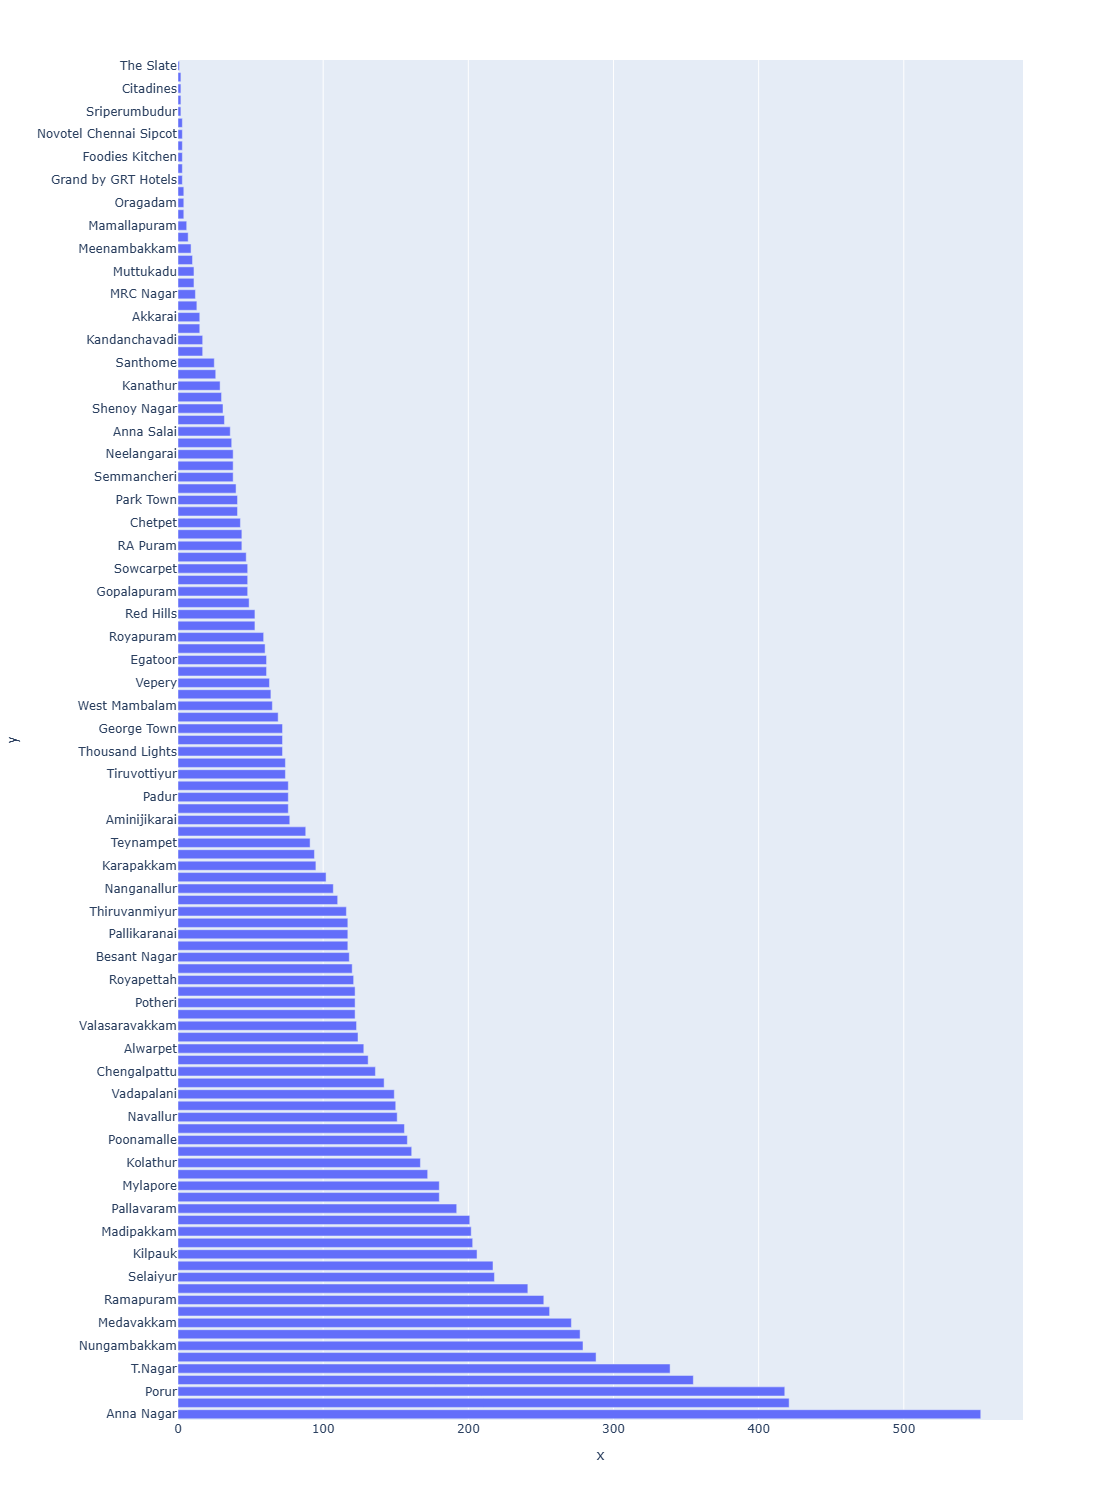

In [27]:
fig=pex.bar(x=no_res_values,y=no_res_loc,width=1500,height=1500)
fig.show()

3)Select top rated restaurant with locations based on customer ratings above 4.5?

In [28]:
top_rated=pre_data[pre_data['Dining Rating']>4.5]
top_rated=top_rated.sort_values(by='Dining Rating',ascending=False)
top_rated[['Name of Restaurant','Location','Dining Rating']].reset_index(drop=True) #drop to avoid extra index

Name of Restaurant             Location  \
0                        Gossip Fusion Bistro             Kanathur   
1                              Brownie Heaven           Royapettah   
2                                Bombay Kulfi                Adyar   
3                       Prems Graama Bhojanam                Adyar   
4                                Kabab Corner               Egmore   
5                                     Bhangra             Kanathur   
6                           The Sandwich Shop        West Mambalam   
7            Momo Sa-Khang by Kailash Kitchen          Choolaimedu   
8                  Avartana - ITC Grand Chola               Guindy   
9          Amadora Gourmet Ice Cream & Sorbet         Nungambakkam   
10                                 The Marina         Nungambakkam   
11            Southern Spice - Taj Coromandel         Nungambakkam   
12                                  Benjarong             Alwarpet   
13               J.Hind - Grand by GRT Hotels  Grand by GRT Hotels   
14                        Royal Sandwich Shop             Alwarpet   
15                           Bombay Brasserie         Nungambakkam   
16                             Eating Circles             Alwarpet   
17                            Fusilli Reasons              Kilpauk   
18                               Rayar's Mess             Mylapore   
19                                      Mezze             Alwarpet   
20                      Kappa Chakka Kandhari         Nungambakkam   
21                                    Soy Soi          Kotturpuram   
22                               Little Italy         Besant Nagar   
23                                  SpiceKlub         Nungambakkam   
24              New Pattukottai Kamatchi Mess              T.Nagar   
25  Dakshin - Crowne Plaza Chennai Adyar Park             Alwarpet   
26                                Andhikkadai            Velachery   
27                                   Wok Monk           Anna Nagar   
28                 Peshawri - ITC Grand Chola               Guindy   
29                               Krispy Kreme           Royapettah   
30                   Vasco's - Hilton Chennai               Guindy   
31                                      Hamsa                Adyar   
32                         Basil With A Twist              T.Nagar   
33                                Haagen Dazs         Nungambakkam   
34                       Arabian Kebab Center          Kodambakkam   
35                             Mainland China            Velachery   
36                East Coast at Madras Square          Neelangarai   
37                               Shree Mithai              Chetpet   
38                                     AlMaza           Anna Nagar   
39                               Bombay Kulfi           Anna Nagar   

    Dining Rating  
0             4.9  
1             4.9  
2             4.9  
3             4.9  
4             4.9  
5             4.9  
6             4.9  
7             4.8  
8             4.8  
9             4.8  
10            4.8  
11            4.7  
12            4.7  
13            4.7  
14            4.7  
15            4.7  
16            4.7  
17            4.7  
18            4.7  
19            4.7  
20            4.7  
21            4.7  
22            4.7  
23            4.6  
24            4.6  
25            4.6  
26            4.6  
27            4.6  
28            4.6  
29            4.6  
30            4.6  
31            4.6  
32            4.6  
33            4.6  
34            4.6  
35            4.6  
36            4.6  
37            4.6  
38            4.6  
39            4.6

4) Select least rated restaurant with locations based on customer ratings below 2.5?

In [29]:
pre_data=pre_data.dropna()
least_rated=pre_data[pre_data['Dining Rating']<2.5]
least_rated=least_rated.sort_values(by='Dining Rating').reset_index(drop=True)
least_rated[['Name of Restaurant','Location','Dining Rating']]

Name of Restaurant         Location  Dining Rating
0                               Maggi Point         Tambaram            0.0
1                            Dhabba Express     Nungambakkam            2.0
2                                  The Rock       Anna Nagar            2.0
3                            Dhabba Express     Besant Nagar            2.0
4                     Hotel Saravana Bhavan          Alandur            2.0
5                          Sachin Ka Dhabba     Thuraipakkam            2.1
6                                   Al Reef      Kottivakkam            2.1
7                                 Hot Chips      Neelangarai            2.1
8                 A2B - Adyar Ananda Bhavan        Chromepet            2.1
9                                  Anjappar      Ashok Nagar            2.1
10                         Ponnusamy Hotels         Saidapet            2.2
11                            Wangs Kitchen          Kilpauk            2.2
12                                Hot Chips        Velachery            2.2
13                                First Cup     Nungambakkam            2.2
14                Courtallam Border Parotta        Velachery            2.2
15                            Wangs Kitchen         Nandanam            2.2
16                          Rahman Biriyani    Mahabalipuram            2.2
17                                Hot Chips       Karapakkam            2.3
18                         Sachin Ka Dhabba       Anna Nagar            2.3
19                                Hot Chips    Thiruvanmiyur            2.3
20                                  Al Reef       Medavakkam            2.3
21                         Ponnusamy Hotels   Sholinganallur            2.3
22              The Grand Sweets and Snacks        Velachery            2.3
23                            Bismi Briyani        Velachery            2.3
24                                   Buhari         Kanathur            2.3
25                           Dhabba Express     Chengalpattu            2.4
26                    Hotel Saravana Bhavan      Gopalapuram            2.4
27                                 Anjappar     Thuraipakkam            2.4
28                                 Anjappar       Triplicane            2.4
29                                   Buhari     Purasavakkam            2.4
30                                   Buhari        Mogappair            2.4
31                                    Igloo     Nungambakkam            2.4
32                   Rajdhani Punjabi Dhaba  Thousand Lights            2.4
33  Madurai Kannappar Chettinadu Restaurant            Porur            2.4
34                               India Gate     Thuraipakkam            2.4
35                            Liu's Waldorf            Adyar            2.4
36                            Wangs Kitchen        Velachery            2.4
37                           Dhabba Express        Teynampet            2.4

5) Mention the Top Cuisine which Chennai’s people eats?

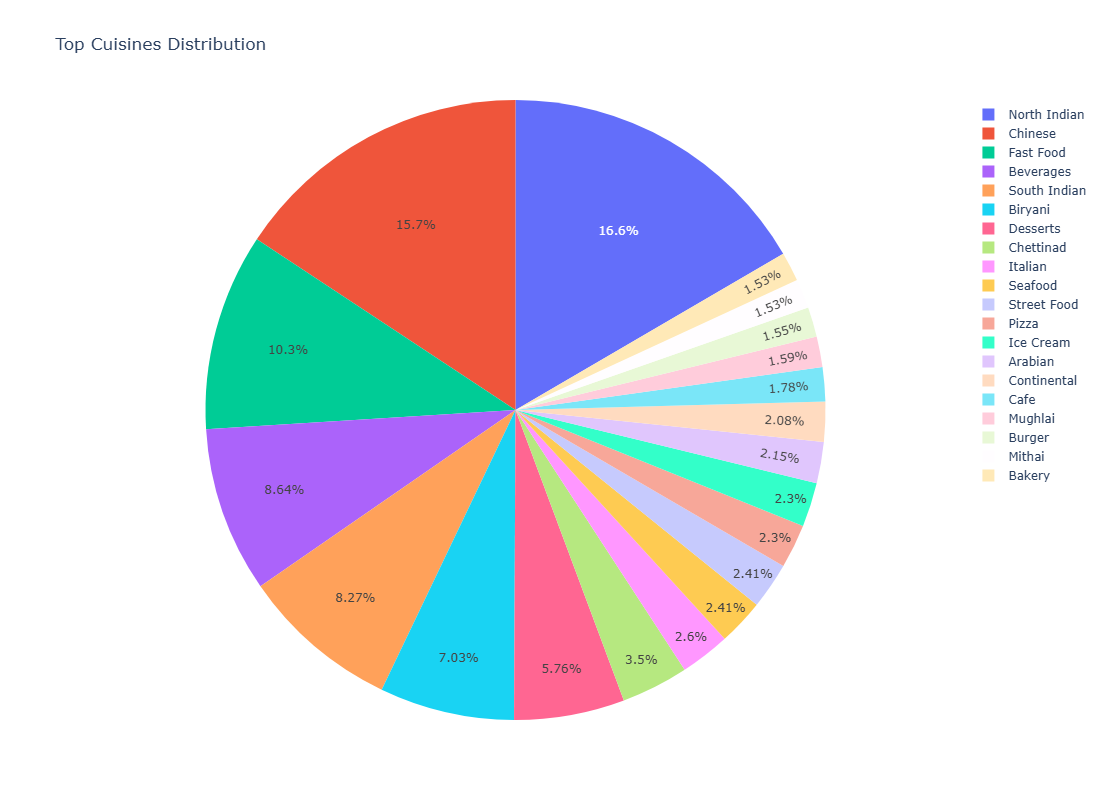

In [30]:
pre_data["Cuisine"] = pre_data["Cuisine"].apply(lambda x : eval(x))
def count_data(Col,topcusinedf):
    count_dict={}
    for cuilist in topcusinedf[Col]:
        for data in cuilist:
            if data.strip(" ") not in count_dict:
                count_dict[data.strip(" ")]=1
            else:
                count_dict[data.strip(" ")]+=1
    data_dict = dict(sorted(count_dict.items(), key = lambda x: x[1], reverse= True))
    df = pd.DataFrame.from_dict(data_dict,orient='index',columns=['Count']).reset_index()
    return count_dict, df

top_cusines_dict, top_cuisine_df = count_data("Cuisine", pre_data)
labels = top_cuisine_df['index'][0:20]  # Cuisine names
sizes = top_cuisine_df['Count'][0:20]    # Count of each cuisine

#Plotting Pie Chart
fig = pex.pie(names=labels, values=sizes, title='Top Cuisines Distribution')
fig.update_layout(width=1000, height=800)

# Show the chart
fig.show()
                
        

6. Mention Top dishes which offered by each restaurant in Chennai?

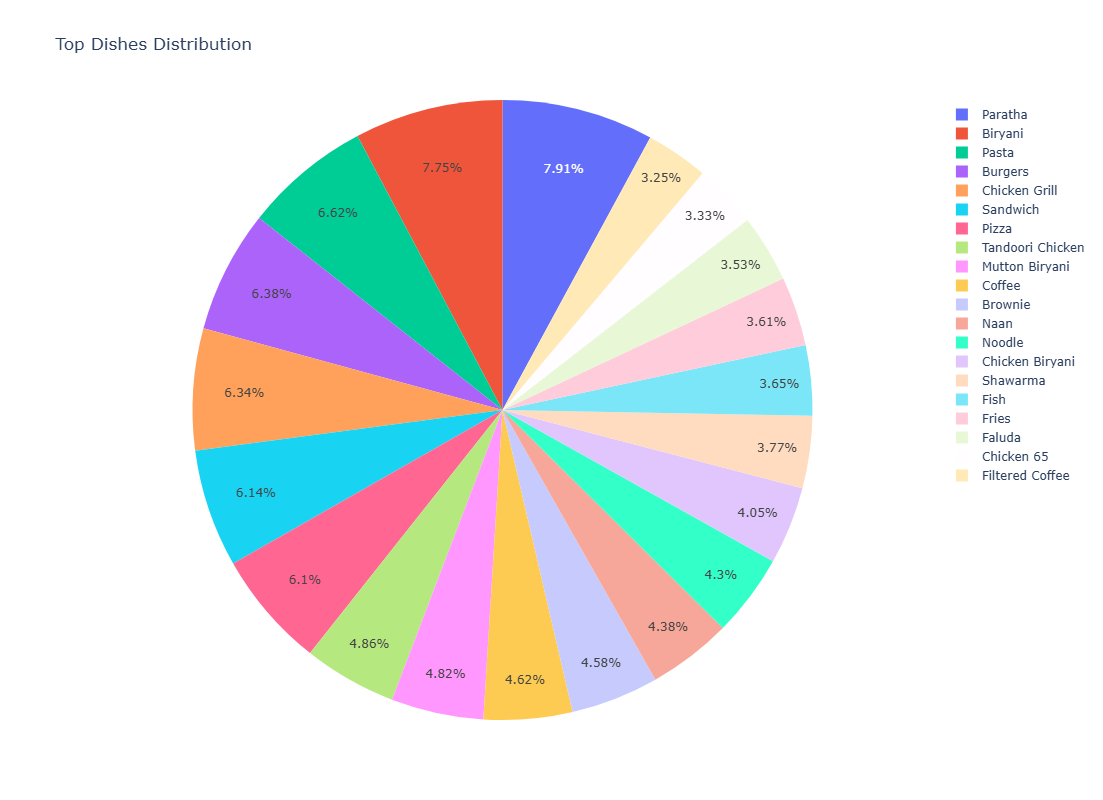

In [31]:
pre_data["Top Dishes"] = pre_data["Top Dishes"].apply(lambda x : eval(x))
top_dish_dict, top_dish_df = count_data("Top Dishes", pre_data)
labels = top_dish_df['index'][0:20]  # Cuisine names
sizes = top_dish_df['Count'][0:20]    # Count of each cuisine

#Plotting Pie Chart
fig = pex.pie(names=labels, values=sizes, title='Top Dishes Distribution')
fig.update_layout(width=1000, height=800)

# Show the chart
fig.show()

7. How many Pure vegetarian hotel and non- vegetarian hotels available in whole Chennai?

In [32]:
#filtering the type of food
def veg_only(col):
    if "Vegetarian Only" in col:
        return "Yes"
    else:
        return "No"
    
#Adding veg column in dataset
pre_data["veg_only"] = pre_data["Features"].apply(lambda x: veg_only(x))


print("Number of Vegetarian Restaraunt :", pre_data["veg_only"].value_counts()[1])
print("Number of Non-Vegetarian Restaraunt :", pre_data["veg_only"].value_counts()[0])

Number of Vegetarian Restaraunt : 400
Number of Non-Vegetarian Restaraunt : 1279


C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\80065081.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_8612\80065081.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



8)Name some of the top-rated vegetarian restaurant in each location at Chennai?

In [33]:
#filtering the veg food restaraunt
veg_hotel = pre_data[(pre_data["veg_only"] == "Yes") & 
            (pre_data["Dining Rating"] >= 4.2) & 
            (pre_data["Top Dishes"].apply(lambda x: "Fruit Juices" not in x 
             and "Icecream Cake" not in x 
             and " Brownie" not in x and "Cake" not in x))]


#Applying group by function
veg_hotel = veg_hotel.groupby(["Name of Restaurant", "Location","Dining Rating", "veg_only"]).size().reset_index()
veg_hotel = veg_hotel.sort_values(by="Dining Rating", ascending=False)
veg_hotel[:40]

Name of Restaurant       Location  Dining Rating veg_only  0
38       Prems Graama Bhojanam          Adyar            4.9      Yes  1
65           The Sandwich Shop  West Mambalam            4.9      Yes  1
41                Rayar's Mess       Mylapore            4.7      Yes  1
27                Little Italy   Besant Nagar            4.7      Yes  1
10              Eating Circles       Alwarpet            4.7      Yes  1
61                   SpiceKlub   Nungambakkam            4.6      Yes  1
23                Krispy Kreme     Royapettah            4.6      Yes  1
54                Shree Mithai        Chetpet            4.6      Yes  1
16                       Hamsa          Adyar            4.6      Yes  1
0                  Andhikkadai      Velachery            4.6      Yes  1
8                  Cream Stone   Thuraipakkam            4.5      Yes  1
58       Shri Rajasthani Dhaba     Anna Nagar            4.5      Yes  1
40                  Ratna Cafe     Triplicane            4.5      Yes  1
66                VB Signature   Nungambakkam            4.5      Yes  1
26                Little Italy     Anna Nagar            4.5      Yes  1
18                          ID     Royapettah            4.5      Yes  1
12                 Flower Drum          Adyar            4.5      Yes  1
59  Shyam's Bombay Halwa House        T.Nagar            4.5      Yes  1
7                  Cream Stone     Anna Nagar            4.4      Yes  1
50           Santé Spa Cuisine   Nungambakkam            4.4      Yes  1
33           Milkshake And Co.   Besant Nagar            4.4      Yes  1
48    Sangeetha Veg Restaurant        T.Nagar            4.4      Yes  1
14   Fruit Shop On Greams Road   Besant Nagar            4.4      Yes  1
53                Shree Mithai     Anna Nagar            4.4      Yes  1
6                 Cream Centre   Nungambakkam            4.4      Yes  1
5                 Cream Centre     Anna Nagar            4.4      Yes  1
60             Signal Tod Cafe   Guduvancheri            4.3      Yes  1
51    Sapthagiri Tiffin Centre        T.Nagar            4.3      Yes  1
56        Shri Balaajee Bhavan      Chromepet            4.3      Yes  1
62               Sree Akshayam     Anna Nagar            4.3      Yes  1
44    Sangeetha Veg Restaurant         Egmore            4.3      Yes  1
43    Sangeetha Veg Restaurant          Adyar            4.3      Yes  1
42                   Roll Over     Anna Nagar            4.3      Yes  1
55        Shri Balaajee Bhavan     Anna Nagar            4.3      Yes  1
37                        Pind      Velachery            4.3      Yes  1
39            Prive Restaurant       Mylapore            4.3      Yes  1
34               Mithai Mandir     Vadapalani            4.3      Yes  1
20                     Jalpaan   Nungambakkam            4.3      Yes  1
25                       Links   Purasavakkam            4.3      Yes  1
2                  Bistro 1427       Mylapore            4.3      Yes  1

9. Name some of the top-rated non-vegetarian restaurant in each location at Chennai?

In [34]:
#filtering the non-veg food restaraunt
nonveg_hotel = pre_data[(pre_data["veg_only"] == "No") & 
                           (pre_data["Dining Rating"] >= 4.5) & 
                           pre_data["Top Dishes"].apply(lambda x: "Fruit Juices" not in x 
                           and "Icecream Cake" not in x 
                           and " Brownie" not in x 
                           and "Cake" not in x) & 
                           (pre_data["Cuisine"].apply(lambda x: "Ice Cream" not in x 
                           and "Bakery" not in x and "Beverages" not in x))]

#Applying Group by function
nonveg_hotel = nonveg_hotel.groupby(["Name of Restaurant", "Location","Dining Rating", "veg_only"]).size().reset_index()
nonveg_hotel = nonveg_hotel.sort_values(by="Dining Rating", ascending=False)
nonveg_hotel[:40]

Name of Restaurant         Location  Dining Rating  \
13                        Kabab Corner           Egmore            4.9   
6                              Bhangra         Kanathur            4.9   
23                          The Marina     Nungambakkam            4.8   
17    Momo Sa-Khang by Kailash Kitchen      Choolaimedu            4.8   
2   Amadora Gourmet Ice Cream & Sorbet     Nungambakkam            4.8   
5                            Benjarong         Alwarpet            4.7   
10                    Bombay Brasserie     Nungambakkam            4.7   
20                 Royal Sandwich Shop         Alwarpet            4.7   
16                               Mezze         Alwarpet            4.7   
22                             Soy Soi      Kotturpuram            4.7   
4                   Basil With A Twist          T.Nagar            4.6   
25                            Wok Monk       Anna Nagar            4.6   
1                               AlMaza       Anna Nagar            4.6   
15                      Mainland China        Velachery            4.6   
24              Va Pho - Asian Canteen      Gopalapuram            4.5   
18                  North East Kitchen           Egmore            4.5   
21   Sera - The Tapas Bar & Restaurant      Gopalapuram            4.5   
19                       Pumpkin Tales         Alwarpet            4.5   
0                        Absolute Thai  Foodies Kitchen            4.5   
14                             Kuuraku       Vadapalani            4.5   
12          Gastronomer By Double Roti        Teynampet            4.5   
11                           BurgerMan     Besant Nagar            4.5   
9                      Blind Ch3mistry        Teynampet            4.5   
8                      Blind Ch3mistry     Nungambakkam            4.5   
7                      Blind Ch3mistry     Besant Nagar            4.5   
3       Asia Kitchen by Mainland China     Nungambakkam            4.5   
26                       Writer's Cafe         Taramani            4.5   

   veg_only  0  
13       No  1  
6        No  1  
23       No  1  
17       No  1  
2        No  1  
5        No  1  
10       No  1  
20       No  1  
16       No  1  
22       No  1  
4        No  1  
25       No  1  
1        No  1  
15       No  1  
24       No  1  
18       No  1  
21       No  1  
19       No  1  
0        No  1  
14       No  1  
12       No  1  
11       No  1  
9        No  1  
8        No  1  
7        No  1  
3        No  1  
26       No  1

10. Provide a variety of dishes available in vegetarian restaurant?

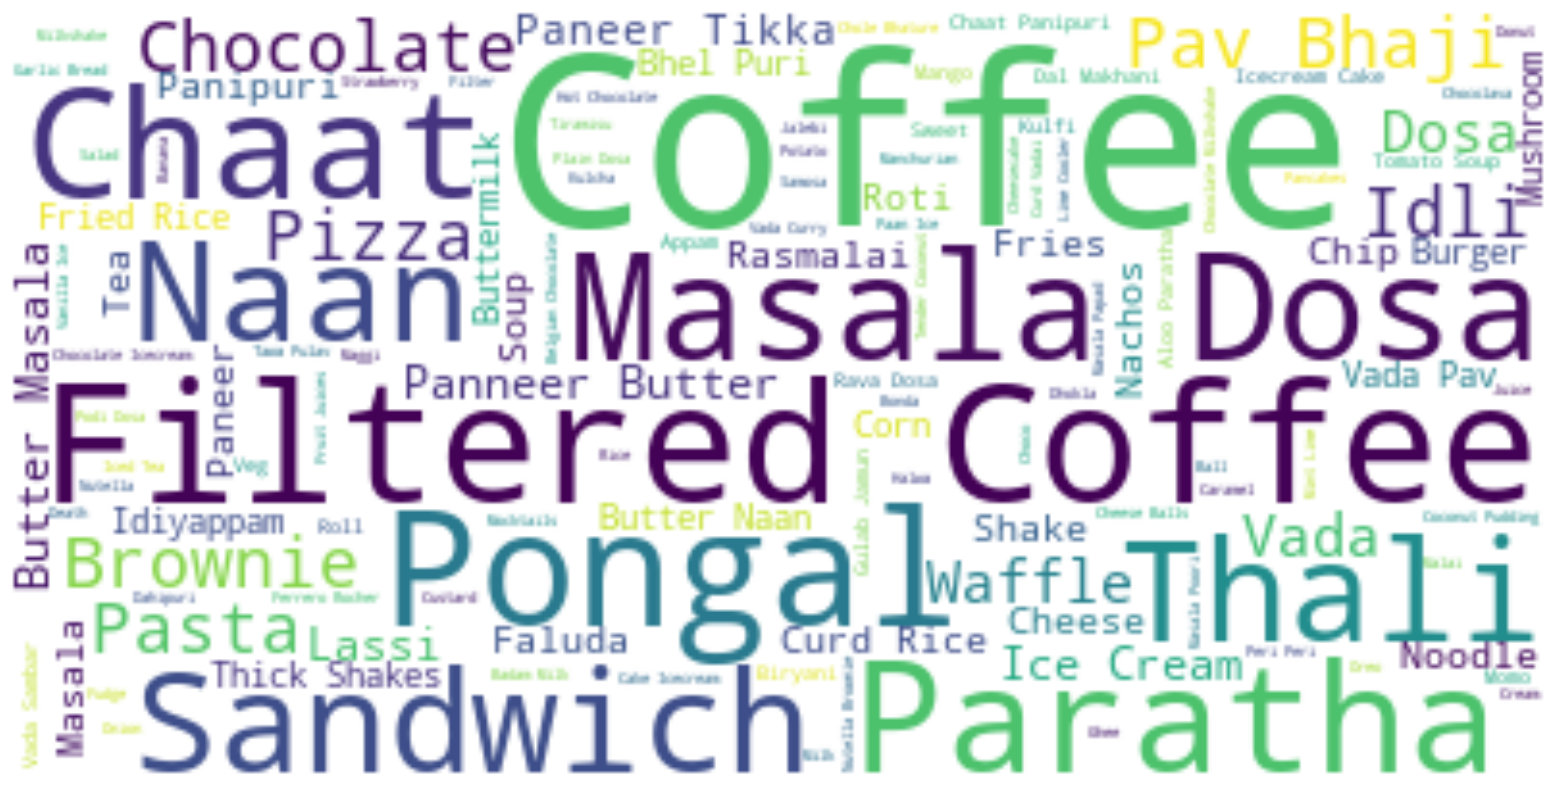

In [35]:
# filtering the veg foods
veg_dish = pre_data[pre_data["veg_only"] == "Yes"]
v_dish = [dish.lstrip(" ") for lst in veg_dish["Top Dishes"].tolist() for dish in lst]
combined_text = " ".join(v_dish)

#plotting the word cloud 
wordcloud = WordCloud(background_color='white').generate(combined_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()